# IFN509 Assignment 2

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [13]:
# Detect environment
IN_COLAB = 'COLAB_GPU' in os.environ or 'google.colab' in str(get_ipython())

# Define data path logic
if IN_COLAB:
    # Option 1: Load directly from GitHub (recommended for read-only data)
    url = "https://raw.githubusercontent.com/edanfisher/QUT/refs/heads/main/data/Dataset.csv"
    df = pd.read_csv(url)

    # Option 2: (if data is large/private)
    # from google.colab import drive
    # drive.mount('/content/drive')
    # df = pd.read_csv('/content/drive/MyDrive/path/to/data.csv')
else:
    # Local path for your machine
    df = pd.read_csv("data/Dataset.csv")

## Task 1 - Examining Data Types

In [14]:
df.head()

,Participant_ID,survey_date,region,country,ip_latitude,ip_longitude,gender,age,height,weight,...,heart_disease,lung_disease,diabetes,hiv_positive,other_chronic,nursing_home,health_worker,risk_infection,risk_infection_level,risk_mortality
0,862217754,02/12/2020,?,US,42.3690,-88.0651,male,30_40,180,98,...,0,0,0,0,0,0,0,100.0,high,0.063
1,2363592,02/07/2020,AF,ZA,-26.2870,28.2427,male,30_40,168,66,...,0,0,1,0,0,0,0,75.0,moderate,0.098
2,2570172,05/07/2020,AF,ZA,-26.2019,28.0273,female,60_70,172,86,...,0,0,0,0,0,0,0,5.0,low,0.582
3,2812446,13/06/2020,AF,ZA,-33.8268,18.4772,male,40_50,172,140,...,1,0,1,0,0,0,0,100.0,high,1.032
4,2867850,29/06/2020,AF,ZA,-26.3120,28.1024,male,20_30,186,78,...,0,0,0,0,0,0,0,5.0,low,0.050


We'll use .info() to examine the datatypes and .isnull() to examine null values - we'll process these later

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Participant_ID          5789 non-null   int64  
 1   survey_date             5789 non-null   object 
 2   region                  5774 non-null   object 
 3   country                 5786 non-null   object 
 4   ip_latitude             5789 non-null   float64
 5   ip_longitude            5789 non-null   float64
 6   gender                  5789 non-null   object 
 7   age                     5789 non-null   object 
 8   height                  5789 non-null   int64  
 9   weight                  5789 non-null   int64  
 10  bmi                     5789 non-null   float64
 11  blood_type              5689 non-null   object 
 12  insurance               4497 non-null   object 
 13  income                  4636 non-null   object 
 14  smoking                 5753 non-null   

In [16]:
df.isnull().sum().sort_values(ascending=False)

,0
cocaine,4359
insurance,1292
worried,1271
public_transport_count,1217
income,1153
blood_type,100
contacts_count,42
smoking,36
working,28
region,15


# Column Data Types & Missing Data Review

| #  | Column                  | Non-Null Count | Current Dtype       | Suggested Dtype         | Missing Values / Notes |
|----|-------------------------|----------------|-------------------|------------------------|-----------------------|
| 0  | Participant_ID          | 5789           | int64             | int64                  | 0, fine |
| 1  | survey_date             | 4874           | datetime64[ns]    | datetime64[ns]         | 915 missing; may have malformed dates |
| 2  | region                  | 5774           | category          | category               | 15 missing |
| 3  | country                 | 5786           | category          | category               | 3 missing |
| 4  | ip_latitude             | 5789           | float64           | float64                | 0 missing, fine |
| 5  | ip_longitude            | 5789           | float64           | float64                | 0 missing, fine |
| 6  | gender                  | 5789           | category          | category               | 0 missing, fine |
| 7  | age                     | 5783           | category          | ordered category       | 6 missing; stored as ranges |
| 8  | height                  | 5789           | int64             | int64                  | 0 missing, fine |
| 9  | weight                  | 5789           | int64             | int64                  | 0 missing, fine |
| 10 | bmi                     | 5789           | float64           | float64                | 0 missing, fine |
| 11 | blood_type              | 5689           | category          | category               | 100 missing |
| 12 | insurance               | 4497           | category          | category               | 1292 missing |
| 13 | income                  | 4636           | category          | category               | 1153 missing |
| 14 | smoking                 | 5753           | category          | category               | 36 missing |
| 15 | alcohol                 | 5789           | float64           | float64                | 0 missing, fine |
| 16 | cocaine                 | 1430           | float64           | float64                | 4359 missing |
| 17 | contacts_count          | 5747           | Int64             | Int64 (nullable)       | 42 missing |
| 18 | public_transport_count  | 4572           | Int64             | Int64 (nullable)       | 1217 missing |
| 19 | working                 | 5761           | category          | category               | 28 missing |
| 20 | worried                 | 4518           | float64           | float64                | 1271 missing |
| 21 | covid19_positive        | 5789           | boolean           | boolean                | 0 missing |
| 22 | covid19_symptoms        | 5789           | boolean           | boolean                | 0 missing |
| 23 | covid19_contact         | 5789           | boolean           | boolean                | 0 missing |
| 24 | asthma                  | 5789           | boolean           | boolean                | 0 missing |
| 25 | kidney_disease          | 5789           | boolean           | boolean                | 0 missing |
| 26 | liver_disease           | 5789           | boolean           | boolean                | 0 missing |
| 27 | compromised_immune      | 5789           | boolean           | boolean                | 0 missing |
| 28 | heart_disease           | 5789           | boolean           | boolean                | 0 missing |
| 29 | lung_disease            | 5789           | boolean           | boolean                | 0 missing |
| 30 | diabetes                | 5789           | boolean           | boolean                | 0 missing |
| 31 | hiv_positive            | 5789           | boolean           | boolean                | 0 missing |
| 32 | other_chronic           | 5789           | boolean           | boolean                | 0 missing |
| 33 | nursing_home            | 5789           | boolean           | boolean                | 0 missing |
| 34 | health_worker           | 5789           | boolean           | boolean                | 0 missing |
| 35 | risk_infection          | 5789           | float64           | float64                | 0 missing |
| 36 | risk_infection_level    | 5789           | category          | category               | 0 missing |
| 37 | risk_mortality          | 5789           | float64           | float64                | 0 missing |


Let's convert the data types explicitly, we could use .asType() to do this in one snippet, but it might fail if there's missing or malformed data. Better to do each type explicitly

In [17]:
# 1. Boolean columns

bool_cols = [
    'covid19_positive', 'covid19_symptoms', 'covid19_contact',
    'asthma', 'kidney_disease', 'liver_disease', 'compromised_immune',
    'heart_disease', 'lung_disease', 'diabetes', 'hiv_positive',
    'other_chronic', 'nursing_home', 'health_worker'
]
df[bool_cols] = df[bool_cols].astype('boolean')

# 2. Categorical columns
safe_cat_cols = [
    'region', 'country', 'gender', 'smoking', 'working', 'risk_infection_level'
]
df[safe_cat_cols] = df[safe_cat_cols].astype('category')

# 3. Float columns that are already clean
numeric_cols = [
    'ip_latitude', 'ip_longitude', 'height', 'weight', 'bmi',
    'alcohol', 'risk_infection', 'risk_mortality'
]
df[numeric_cols] = df[numeric_cols].astype('float64')

# --------------------------
# 4. Columns to preprocess later (commented)
# --------------------------
# survey_date -> convert to datetime after fixing bad/missing values
# df['survey_date'] = pd.to_datetime(df['survey_date'], errors='coerce')

# age -> ordered category
# age_order = ['0_10','10_20','20_30','30_40','40_50','50_60','60_70','70_80','80_90','90_100']
# df['age'] = pd.Categorical(df['age'], categories=age_order, ordered=True)

# blood_type, insurance, income, cocaine, contacts_count, public_transport_count, worried
# -> preprocess missing / malformed values before conversion

Double check

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Participant_ID          5789 non-null   int64   
 1   survey_date             5789 non-null   object  
 2   region                  5774 non-null   category
 3   country                 5786 non-null   category
 4   ip_latitude             5789 non-null   float64 
 5   ip_longitude            5789 non-null   float64 
 6   gender                  5789 non-null   category
 7   age                     5789 non-null   object  
 8   height                  5789 non-null   float64 
 9   weight                  5789 non-null   float64 
 10  bmi                     5789 non-null   float64 
 11  blood_type              5689 non-null   object  
 12  insurance               4497 non-null   object  
 13  income                  4636 non-null   object  
 14  smoking                 

## Task 2 - Data Exploration

Task 2.1 - Identify missing values, outliers, inappropriate or inconsistent values, or errors in the
data. List the variables with the identified problems.

Task 2.2 - Identify and report the skewness present in the variables.  

In [19]:
# Numeric columns (ready to calculate skew)
numeric_columns_df = df.select_dtypes(np.number).columns

Skewness of Participant_ID: 2.016181406705524


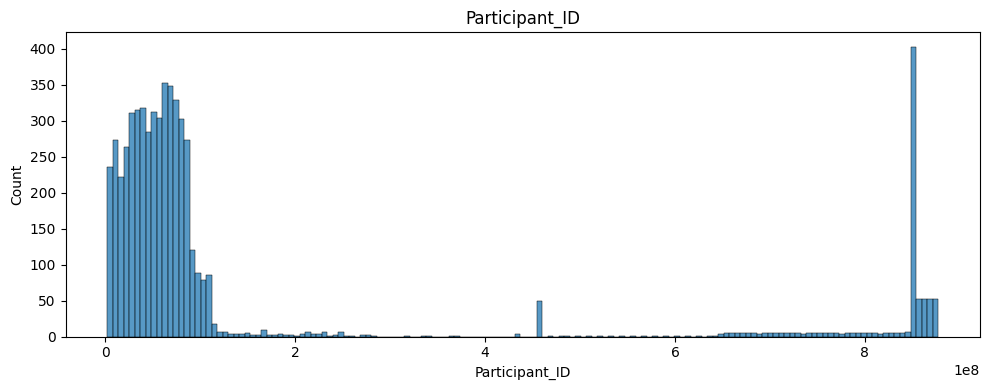

Skewness of ip_latitude: -2.183174072041862


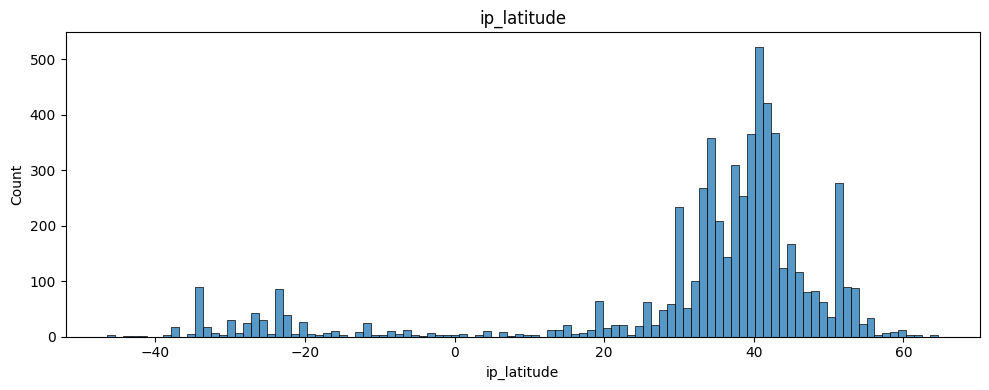

Skewness of ip_longitude: 1.7371474903138824


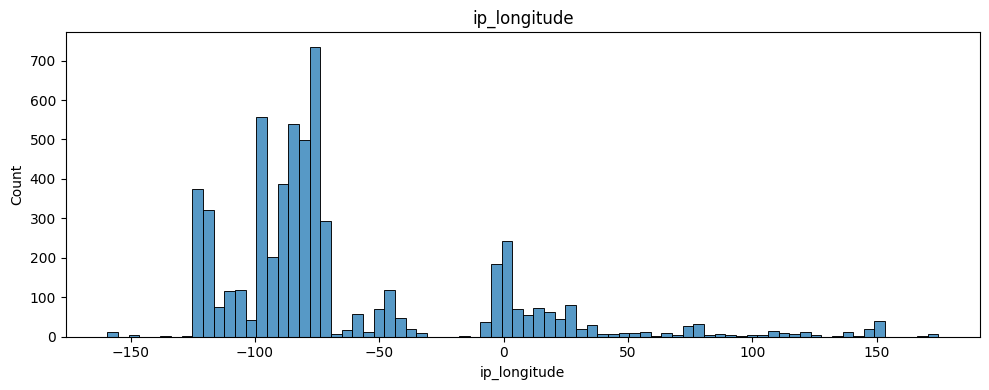

Skewness of height: -0.39242376808496204


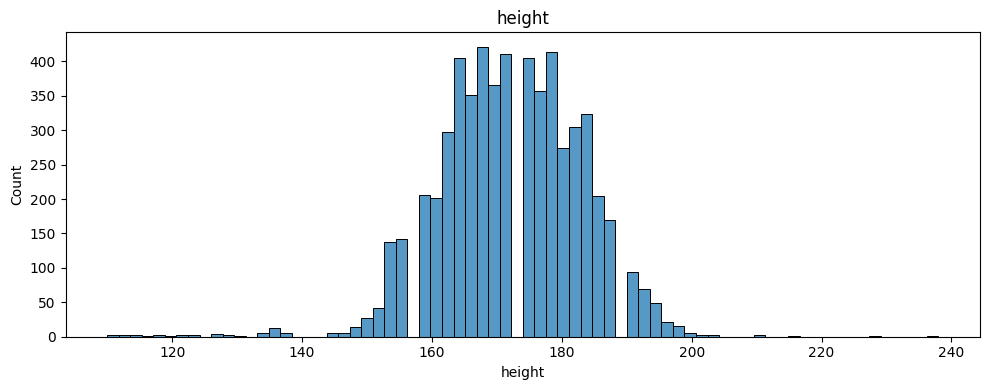

Skewness of weight: 1.140230400882923


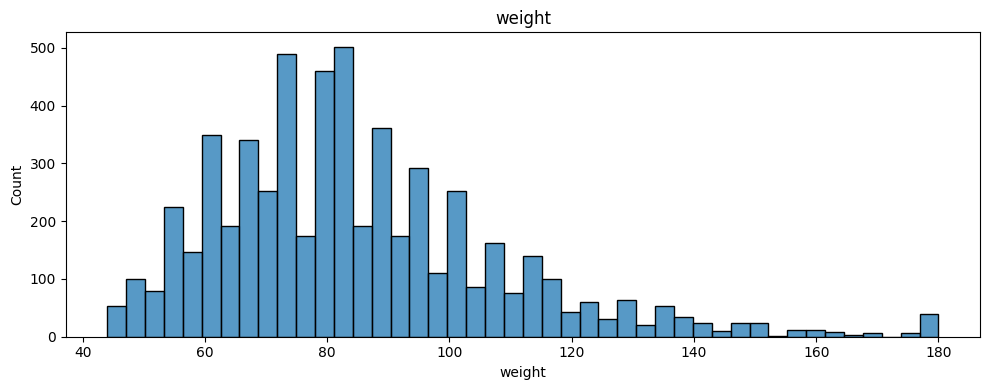

Skewness of bmi: 1.976549308846488


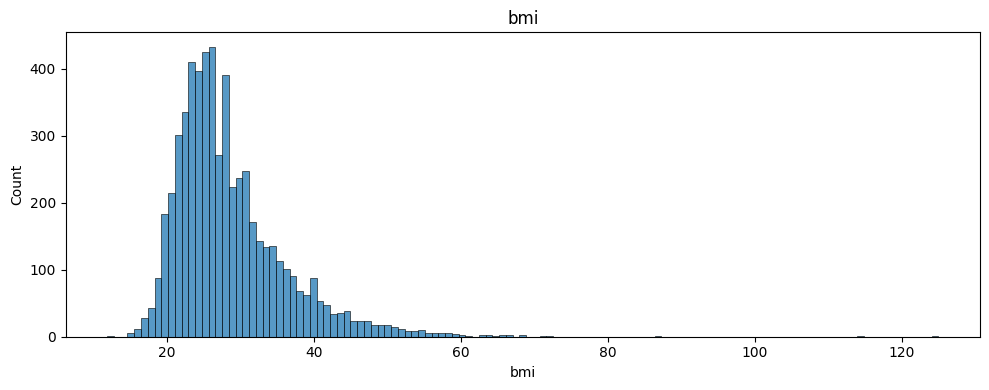

Skewness of alcohol: 1.8517886700459052


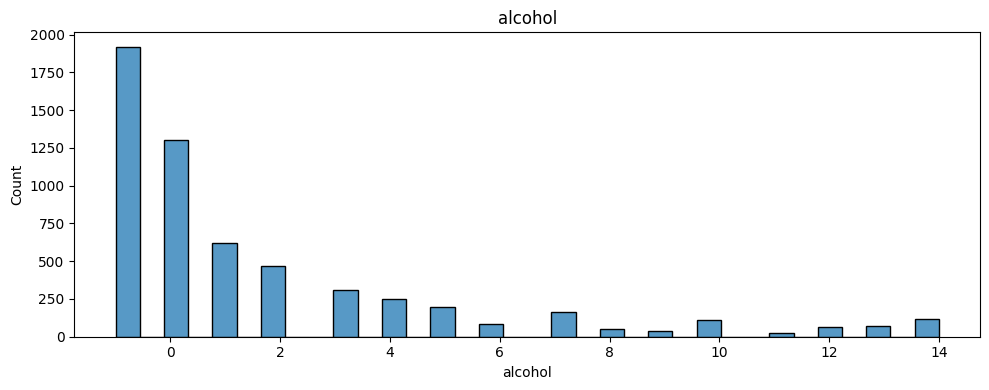

Skewness of cocaine: 6.78994963886583


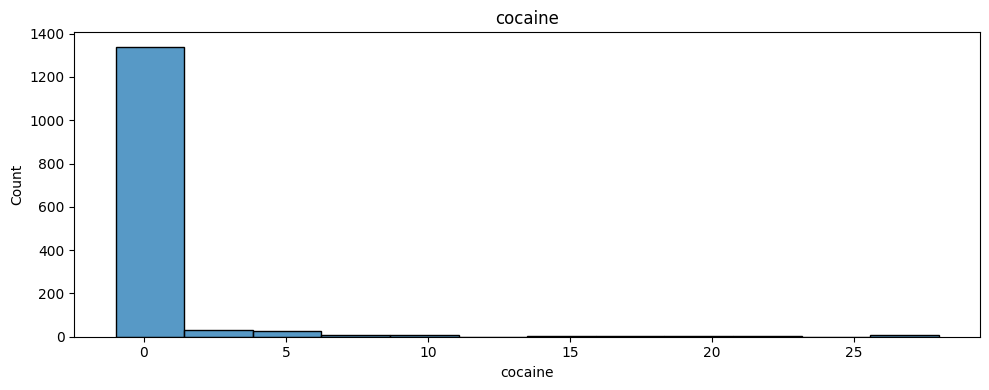

Skewness of contacts_count: 0.9283646197250839


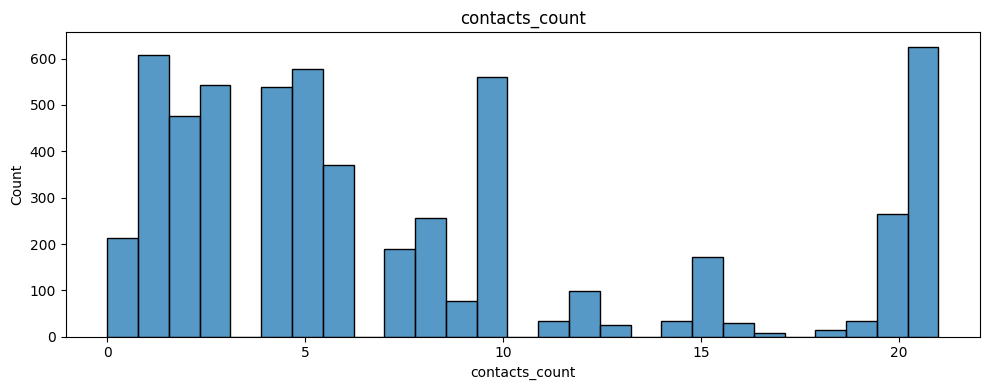

Skewness of public_transport_count: 5.682016202345195


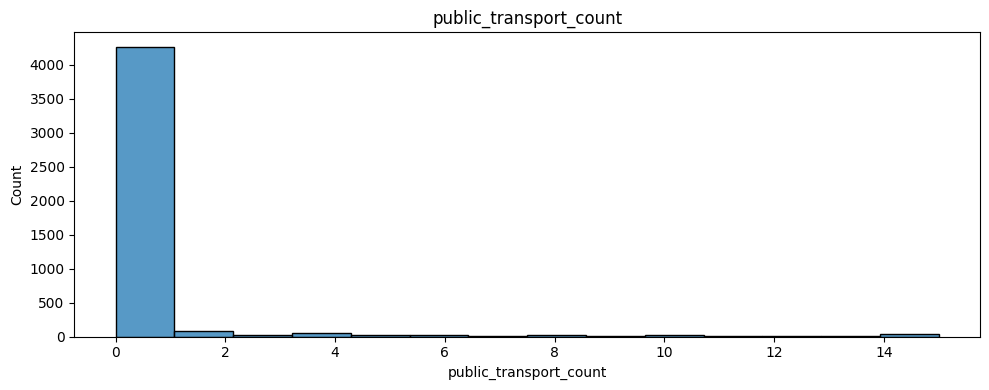

Skewness of worried: -0.3618198132583901


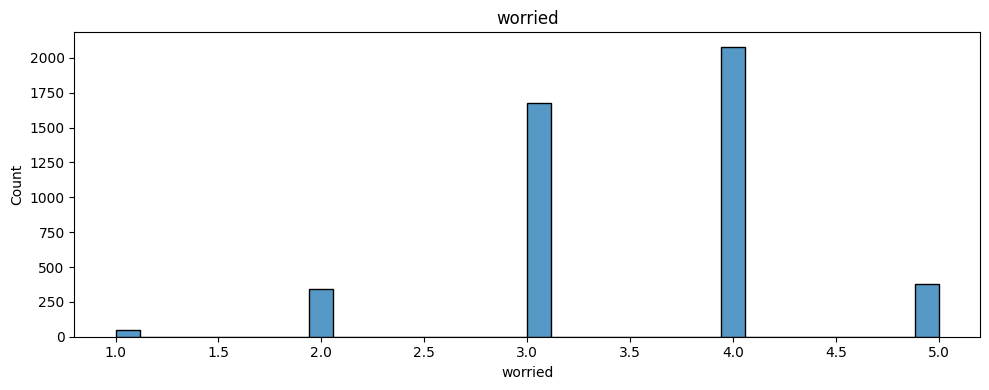

Skewness of risk_infection: 0.08815243458444481


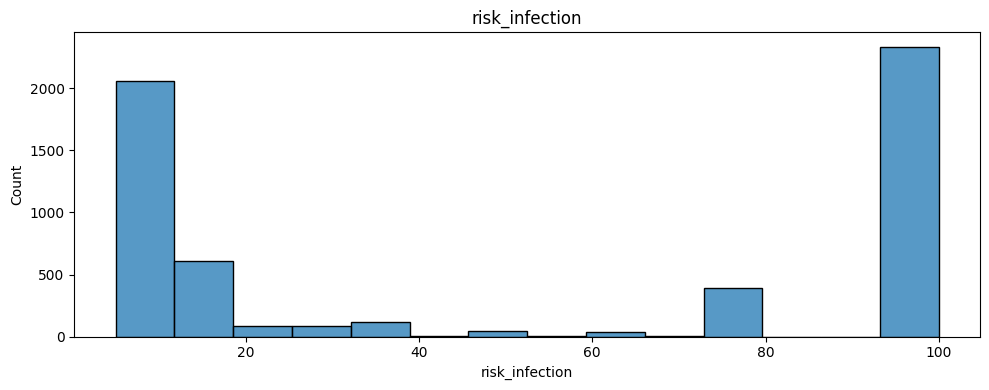

Skewness of risk_mortality: 7.257845944401507


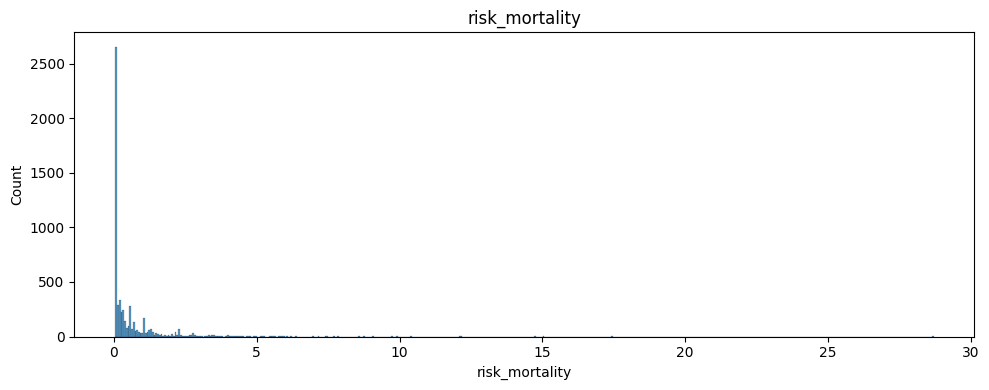

In [20]:
for col in numeric_columns_df:
    print(f"Skewness of {col}:", df[col].skew())
    plt.figure(figsize=(10,4))
    sns.histplot(df[col])
    plt.title(col)
    plt.tight_layout()
    plt.show()


Task 2.3 - If you need to change the type of some variables in order to identify the problems of
these variables, e.g., check the skewness of some categorical variables, you need to
report the changes.  

In [21]:
# Need to figure out here which categorical variables we need to calculate skew on

Task 2.4 - Describe how you have identified these problems with evidence for each of the
identified problems, e.g., plots, your Python code snippets, and outputs produced by
your code.

In [22]:
# Need to figure out 2.3 first

Task 2.5 - Answer the following questions

(a). What is the average contacts_count of a patient from the US who is COVID-19
positive?  

In [23]:
# Filter only covid positive people
positive_cases = df[df['covid19_positive'] == 1]

# Calculate average contacts
average_contacts = positive_cases['contacts_count'].mean()

print("Average contacts for COVID-19 positive people:", average_contacts)

Average contacts for COVID-19 positive people: 8.346707370257304


(b). Which country has the highest number of covid19_positive?

In [24]:
# Filter only covid positive people
positive_cases = df[df['covid19_positive'] == 1]

# Calculate value counts for each country
country_counts = positive_cases['country'].value_counts()

# Calculate top country
top_country = country_counts.idxmax()

print("Country with the highest number of covid19_positive:", top_country)

Country with the highest number of covid19_positive: US


(c). How many health workers in the dataset? and how many of them are covid19 positive?

In [25]:
# Filter only covid positive people
health_workers = df[df['health_worker'] == 1]

# Calculate covid positive counts
covid_positive_workers = health_workers[health_workers['covid19_positive'] == 1]

print("Number of health workers in this dataset:", len(health_workers))
print("Number of Covid positive health workers:", len(covid_positive_workers))

Number of health workers in this dataset: 490
Number of Covid positive health workers: 182


(d). Which are the top-five countries according to the average mortality risk?

In [26]:
# Calculate value counts for each country
avg_mortality_risk_by_country = df.groupby('country')['risk_mortality'].mean().reset_index()

# Sort descending and show just the top five countries
avg_mortality_risk_by_country.sort_values(by='risk_mortality', ascending=False).head(5)

/tmp/ipython-input-2515633882.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_mortality_risk_by_country = df.groupby('country')['risk_mortality'].mean().reset_index()


,country,risk_mortality
0,AD,3.9940
15,BS,2.2730
6,AW,2.1710
2,AM,1.9235
45,IR,1.7875


## Task 3 - Data Preparation

Summarize your findings from your data exploration task.

Process the dataset to fix the identified data quality problems.

Elaborate on the data preparation steps, e.g., data cleaning, transformation, or
normalization.

Demonstrate the data preparation by including screenshot(s) of your Python code
snippets and its outputs that show how you corrected the identified data quality
problems in this dataset.

Describe here if you create any new derived variables and describe why you need these
derived variables.  

## Task 4 - Variable Correlation Analysis

Examine the correlations of the variables pairwisely, including both numerical and
categorical variables.

In [27]:
numeric_columns_df = df.select_dtypes(np.number)

<Axes: >

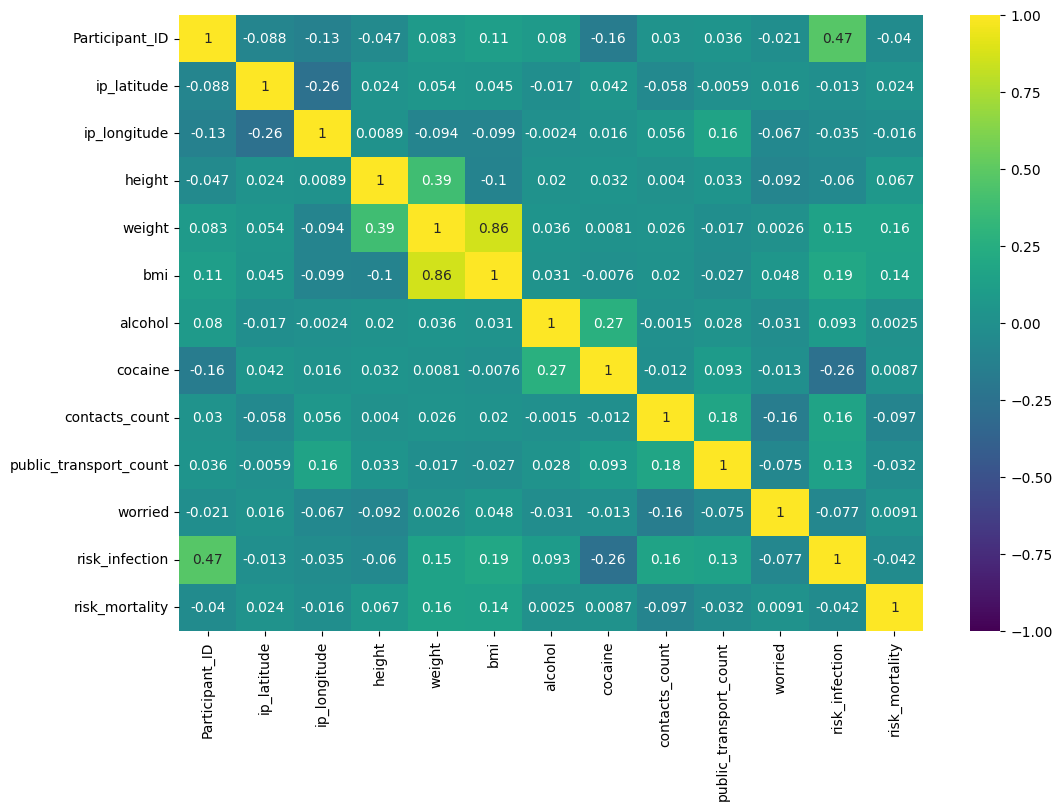

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(numeric_columns_df.corr(),annot=True,cmap='viridis',vmin=-1,vmax=1)

Identify the highly correlated variable pairs and elaborate on how to treat these
variables in predictive machine learning models, especially the variables
covid19_positive and risk_infection, how would you handle these two
variables in predictive machine learning models based on your findings?  

Detail how you have identified the relationships by using suitable functions and
visualisation plots.